# PCA - Code

In diesem Notebook schauen wir uns das `PCA` Modell für die Dimensionsreduktion an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [51]:
import pickle

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [52]:
with open('./data/cifar_subset.pkl', 'rb') as f:
    data = pickle.load(f)
X_data, y_data = data["images"], data["labels"]

X_data = X_data.reshape(X_data.shape[0], -1)

In [53]:
from sklearn.utils import shuffle
X_data, y_data = shuffle(X_data, y_data, random_state=0)

X_data = X_data[:1000, :]
y_data = y_data[:1000]

## Datensatz - MNIST

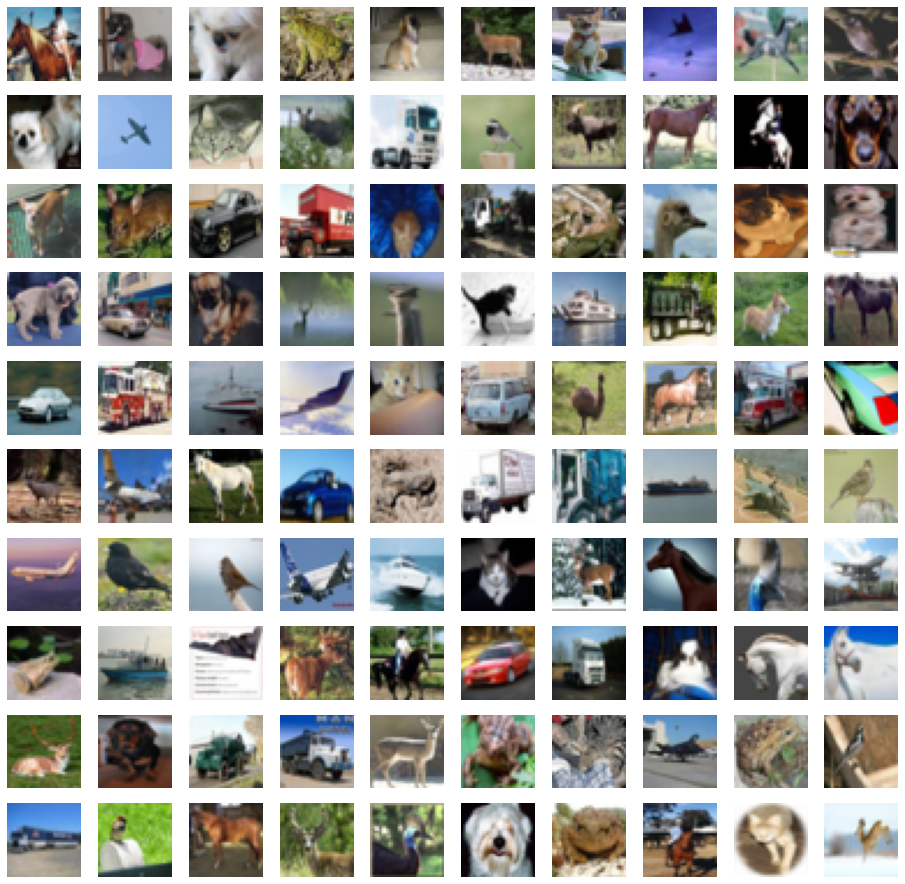

In [54]:
images_in_input_space = X_data.reshape(X_data.shape[0], 32, 32, 3)

_, axes = plt.subplots(nrows=10, ncols=10, figsize=(16, 16))
for ax, image in zip(axes.flatten(), images_in_input_space):
    ax.set_axis_off()
    ax.imshow(image)

## PCA - Dimensionality Reduction only

In [55]:
%%time

pca = PCA(n_components=0.9)
pca.fit(X_data)

print(np.sum(pca.explained_variance_ratio_))

images_in_pca_space = pca.transform(X_data)

images_in_input_space_reconstructed = pca.inverse_transform(images_in_pca_space)
images_in_input_space_reconstructed = np.clip(images_in_input_space_reconstructed, 0, 255).astype(int)
images_in_input_space_reconstructed = images_in_input_space_reconstructed.reshape(-1, 32, 32, 3)

print("pca.n_components_", pca.n_components_)
print("images_in_input_space.shape:", images_in_input_space.shape)
print("images_in_pca_space.shape:", images_in_pca_space.shape)
print("images_in_input_space_reconstructed.shape:", images_in_input_space_reconstructed.shape)

0.9001482854535303
pca.n_components_ 95
images_in_input_space.shape: (5000, 32, 32, 3)
images_in_pca_space.shape: (5000, 95)
images_in_input_space_reconstructed.shape: (5000, 32, 32, 3)
CPU times: user 2min 6s, sys: 5.33 s, total: 2min 11s
Wall time: 23.4 s


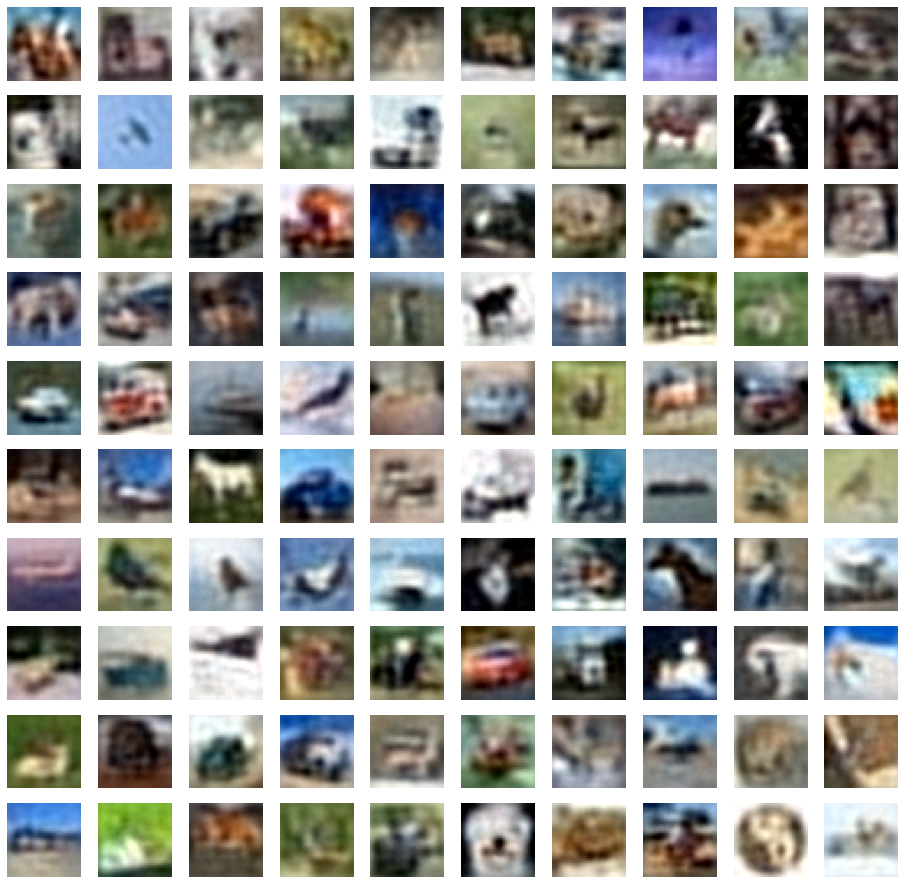

In [56]:
_, axes = plt.subplots(nrows=10, ncols=10, figsize=(16, 16))
for ax, image in zip(axes.flatten(), images_in_input_space_reconstructed):
    ax.set_axis_off()
    ax.imshow(image)

## Baseline - Logistic Regression without Dimensionality Reduction

In [57]:
%%time

model = Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression(max_iter=10000)),
])

print(np.mean(cross_val_score(model, X_data, y_data)))


KeyboardInterrupt



## PCA - Dimensionality Reduction as Preprocessing

In [58]:
%%time

model = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('clf', LogisticRegression(max_iter=10000)),
])

print(np.mean(cross_val_score(model, X_data, y_data)))


KeyboardInterrupt

